In [1]:
import pandas as pd
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
#Remove Null values
print(list((df[(df['Route'].isna())|(df['Total_Stops'].isna())].index))[0])

9039


In [4]:
df.drop(index=9039,inplace=True,axis=0)

In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Airline'].value_counts().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df['Date_of_Journey'] =pd.to_datetime( df['Date_of_Journey'], format = '%d/%m/%Y')

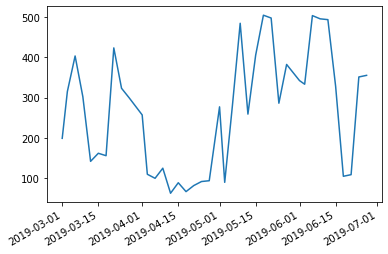

In [8]:
df['Date_of_Journey'].value_counts().plot(kind='line')

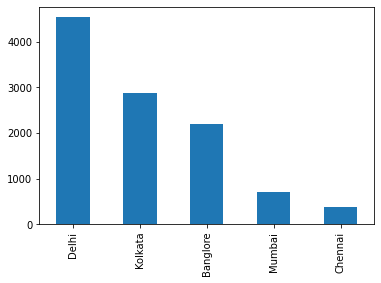

In [9]:
df['Source'].value_counts().plot(kind='bar')

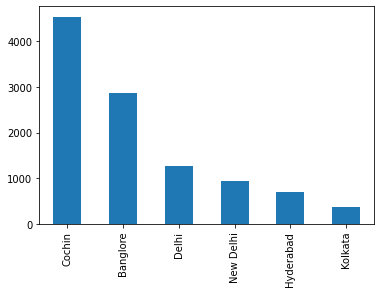

In [10]:
df['Destination'].value_counts().plot(kind='bar')

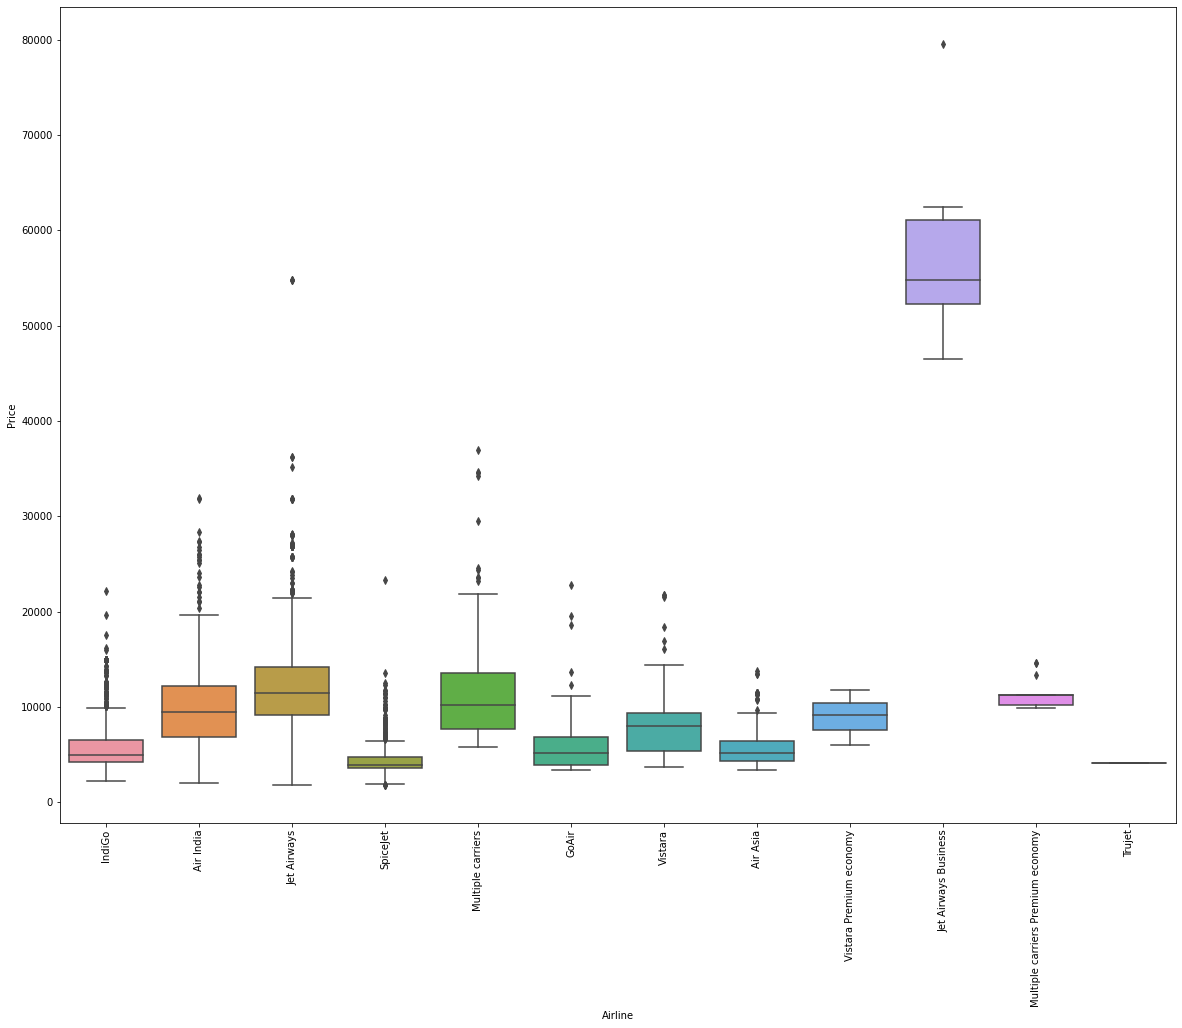

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(df['Airline'],df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

<Figure size 720x720 with 0 Axes>

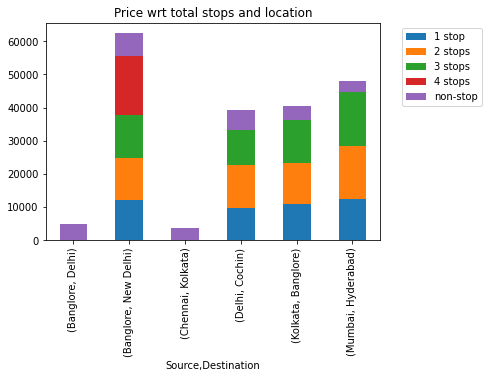

In [12]:
plt.figure(figsize=(10,10))
df.groupby(['Source','Destination','Total_Stops'])['Price'].median().unstack().plot(kind='bar',stacked=True)
plt.title('Price wrt total stops and location')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [13]:
anom=[]
for i in df.index:
    try:
        if len(df.iloc[int(i),6])>5:
            anom.append(i)
    except:
        pass
arrival_d=[]
for i in anom:
    df.iloc[i,6]=df.iloc[int(i),6][:5]
df.iloc[anom]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1 stop,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,2019-06-12,Delhi,Cochin,DEL → BOM → COK,18:15,19:00,24h 45m,1 stop,In-flight meal not included,10262
10667,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20,21h 25m,1 stop,In-flight meal not included,11087
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25,15h,2 stops,No info,16704


In [14]:
a=[]
for i in df.index:
    try:
        a.append(df.iloc[int(i),4].split('→'))
    except:
        a.append('No value')
df['Route']=a
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
df[df['Route']=='No value']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10682,Air India,2019-05-09,Delhi,Cochin,No value,10:55,19:15,8h 20m,2 stops,No info,11753


In [16]:
df.drop(index=10682,inplace=True,axis=0)

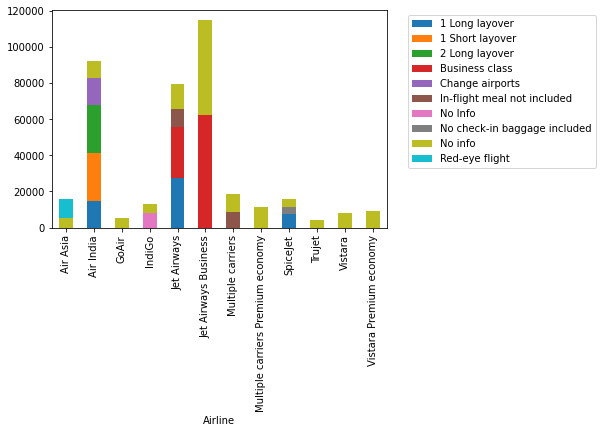

In [17]:
df.groupby(['Airline','Additional_Info'])['Price'].median().unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1))

In [18]:
time = list(df["Duration"])

for i in range(len(time)):
    if len(time[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in time[i]:
            time[i] = time[i].strip() + " 0m"   # Adds 0 minute
        else:
            time[i] = "0h " + time[i]           # Adds 0 hour

hours = []
mins = []
for i in range(len(time)):
    hours.append(int(time[i].split(sep = "h")[0]))    # Extract hours from duration
    mins.append(int(time[i].split(sep = "m")[0].split()[-1]))  
df["Duration_hours"] = hours
df["Duration_mins"] = mins
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,2h 50m,non-stop,No info,3897,2,50
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,19h,2 stops,No info,13882,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,4,45


In [19]:
df.drop('Duration',inplace=True,axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,non-stop,No info,3897,2,50
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,2 stops,No info,7662,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,2 stops,No info,13882,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,1 stop,No info,6218,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,1 stop,No info,13302,4,45


In [20]:
df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [21]:
for i in df[df['Additional_Info']=='No Info'].index:
    df.iloc[i,8]='No info'

In [22]:
df.drop(9220,inplace=True,axis=0)

In [23]:
df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,0,No info,3897,2,50
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,2,No info,7662,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,2,No info,13882,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,1,No info,6218,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,1,No info,13302,4,45


In [24]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",01:10,0,No info,3897,2,50,22,20
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",13:15,2,No info,7662,7,25,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",04:25,2,No info,13882,19,0,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",23:30,1,No info,6218,5,25,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",21:35,1,No info,13302,4,45,16,50


In [25]:
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,"[BLR , DEL]",0,No info,3897,2,50,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",2,No info,7662,7,25,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,"[DEL , LKO , BOM , COK]",2,No info,13882,19,0,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,"[CCU , NAG , BLR]",1,No info,6218,5,25,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,"[BLR , NAG , DEL]",1,No info,13302,4,45,16,50,21,35


In [26]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df["Journey_year"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,"[BLR , DEL]",0,No info,3897,2,50,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",2,No info,7662,7,25,5,50,13,15,1,5,2019
2,Jet Airways,Delhi,Cochin,"[DEL , LKO , BOM , COK]",2,No info,13882,19,0,9,25,4,25,9,6,2019
3,IndiGo,Kolkata,Banglore,"[CCU , NAG , BLR]",1,No info,6218,5,25,18,5,23,30,12,5,2019
4,IndiGo,Banglore,New Delhi,"[BLR , NAG , DEL]",1,No info,13302,4,45,16,50,21,35,1,3,2019


In [27]:
dfn2=df[['Airline','Source','Destination','Additional_Info']]
dfn2=pd.get_dummies(dfn2,drop_first=True)
dfn2.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
df.drop(['Airline','Source','Destination','Additional_Info','Route'],inplace=True,axis=1)
df.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Journey_year
0,0,3897,2,50,22,20,1,10,24,3,2019
1,2,7662,7,25,5,50,13,15,1,5,2019
2,2,13882,19,0,9,25,4,25,9,6,2019
3,1,6218,5,25,18,5,23,30,12,5,2019
4,1,13302,4,45,16,50,21,35,1,3,2019


In [29]:
df=df.join([dfn2])
df.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,2,50,22,20,1,10,24,3,...,0,1,0,0,0,0,0,0,1,0
1,2,7662,7,25,5,50,13,15,1,5,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,19,0,9,25,4,25,9,6,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,5,25,18,5,23,30,12,5,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,4,45,16,50,21,35,1,3,...,0,1,0,0,0,0,0,0,1,0


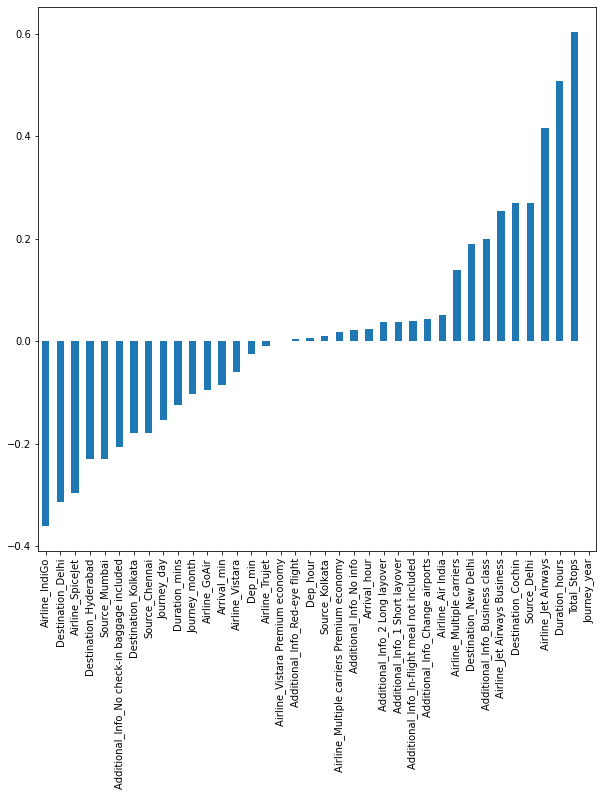

In [30]:
plt.figure(figsize=(10,10))
df.drop('Price',axis=1).corrwith(df['Price']).sort_values().plot(kind='bar')
plt.show()

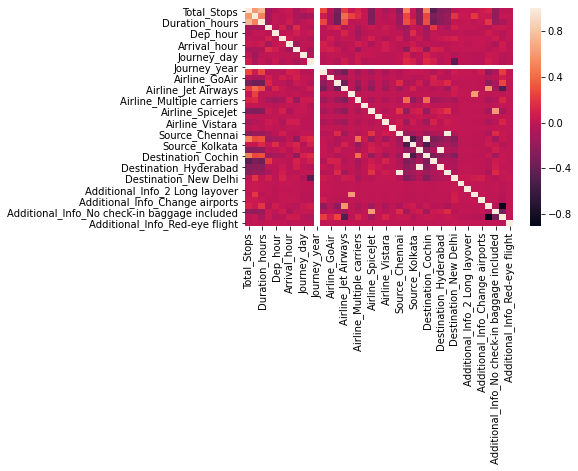

In [31]:
sns.heatmap(df.corr())

In [32]:
X=df.drop('Price',axis=1)
y=df['Price']

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X.values,df['Price'].values,train_size=0.7,random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
from sklearn.metrics import r2_score
x=r2_score(ytest,model.predict(xtest))
print(x)

0.6996912247044025


In [35]:
from sklearn.tree import DecisionTreeRegressor
clfr=DecisionTreeRegressor()
clfr.fit(xtrain,ytrain)
y=r2_score(ytest,clfr.predict(xtest))
print(y)

0.8073586887299549


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
z=r2_score(ytest,rfr.predict(xtest))
print(z)

0.8760174935879546


In [37]:
from xgboost import XGBRegressor
m=XGBRegressor()
m.fit(xtrain,ytrain)
z=r2_score(ytest,m.predict(xtest))
print(z)

0.9078306525372726


In [39]:
m.fit(X.values,df['Price'].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
import pickle
pickle.dump( m, open( "predictor", "wb" ) )